# "Analysis and location of Technical Service venues for computers and laptops in Lima, Peru".

In [2]:
#Import libraries
#----------------
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

## 1. Introduction

#### Lima city, where I live, is the capital and the most populous city in the Republic of Peru. It is located on the central coast of the country, on the shores of the Pacific Ocean, with approximately 11 million inhabitants representing 32% of the Peruvian population. It was founded on January 18, 1535 with the name of the City of Kings by the Spanish conquistador Francisco Pizarro. Both the city of Lima and those of the interior of the country have a gastronomic, cultural, mining and cultivation wealth.

#### Metropolitan Lima is divided into 50 districts (Boroughs) in total, where the province of Lima has 43 districts and the constitutional province of Callao with 7 districts. It is also organized in cones or axes of the city: North Lima, Downtown Lima, Modern Lima, East Lima, South Lima, Callao and health resort.

#### Currently in the world, the Covid-19 pandemic has brought damage in health, job dismissal and the economy of many countries, confining us into our houses in social isolation; in this way, families have changed: their consumption habits, remote work, online classes for children, deliverys  services, use of streaming platforms (for example Netflix, Youtube, Spotify, etc.), learning platforms and others. All of this make us purchase, repair  computers, laptops, tablets, printers and mobile phones this way.

#### This is the reason why we could take advantage of the location data of “Foursquare API” which would help families to solve this problem of having a technical service nearby and, at the same time, the opportunity to invest in a similar business where this service does not exist, especially in the districts with higher economic incomes.

### 1.1 Ubication of Lima, Perú

In [3]:
#Show ubication of Lima Perú
#---------------------------
Lima_map = folium.Map(location=[-12.04318, -77.02824], zoom_start=3) 
folium.Marker([-12.04318, -77.02824], popup='Lima Peru').add_to(Lima_map)
Lima_map

## 2. Data Description

#### To consider the problem I can list the datas as below:

#### * INEI: National Institute of Statistics and Informatics, which is an autonomous constitutional body of Peru. He is also in charge of population, housing, business, agrarian, university, etc. censuses.
(https://www.inei.gob.pe/)

#### * CPI: Peruvian company dedicated to research, market research and public opinion.
(http://cpi.pe/)

#### * APEIM: Peruvian Association of Market Intelligence Companies is a non-profit association that groups market research and public opinion companies with the purpose of promoting, developing, protecting and defending market research activity in Peru.
(http://apeim.com.pe/)

#### * Forsquare API: To get the closest places to locate technical service for computers, laptops, printers and accessories.
(https://foursquare.com/)

#### * Geodata: It allows obtaining the latitude and longitude of a point in the world.
(https://www.geodatos.net/)

## 3. Methodology

#### For solving the problem it will be usage the data sources indicated in the previos point. Data wrangling will include pre-processing, clean, transformation and data formatting. 

#### The master data of Lima city is divided into 50 districts (Boroughs). It is also organized in cones or axes of the city: North Lima, Downtown Lima, Modern Lima, East Lima, South Lima, Callao and health resort. The master data has the folowing columns:

In [7]:
#Read file with districts (Boroughs)
#df_districts = pd.read_excel('Distritos_Lima.xlsx')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0fc2bc806def43ae8a798aa0556ecb5e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XtQCdAVTPGN10B9HfTFUcZp1SHdknvhLQzOEnDw_Dzg8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0fc2bc806def43ae8a798aa0556ecb5e.get_object(Bucket='courseracapstoneweek2-donotdelete-pr-1ji3u52ip51al7',Key='Distritos_Lima.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_districts = pd.read_excel(body)
df_districts.head()

,Borough,Axes,Latitude,Longitude,Population
0,Ancón,Balnearios,-11.7736,-77.1761,70.1
1,Ate Vitarte,Lima Este,-12.0261,-76.9192,667.2
2,Barranco,Lima Moderna,-12.1492,-77.0217,37.5
3,Bellavista,Callao,-12.0601,-77.1116,81.7
4,Breña,Lima Centro,-12.0569,-77.0536,93.4


### 3.1. Show Districts (Boroughs) of Lima City

#### I used python folium library to visualize geographic details of Lima and its boroughs. I used latitude and longitude values to get the visual as below:

In [8]:
venues_map = folium.Map(location=[-12.04318, -77.02824], zoom_start=10) 

for lat, lng, label in zip(df_districts.Latitude, df_districts.Longitude, df_districts.Borough):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map


### 3.2. Show the population by Borough

#### In the next graph, I show the population by Borough in Lima City. The column Population is expressed in thousand:

In [9]:
#Select data from dataframe
df_graph = df_districts.loc[:, ['Borough','Population']]
df_graph.head()

,Borough,Population
0,Ancón,70.1
1,Ate Vitarte,667.2
2,Barranco,37.5
3,Bellavista,81.7
4,Breña,93.4


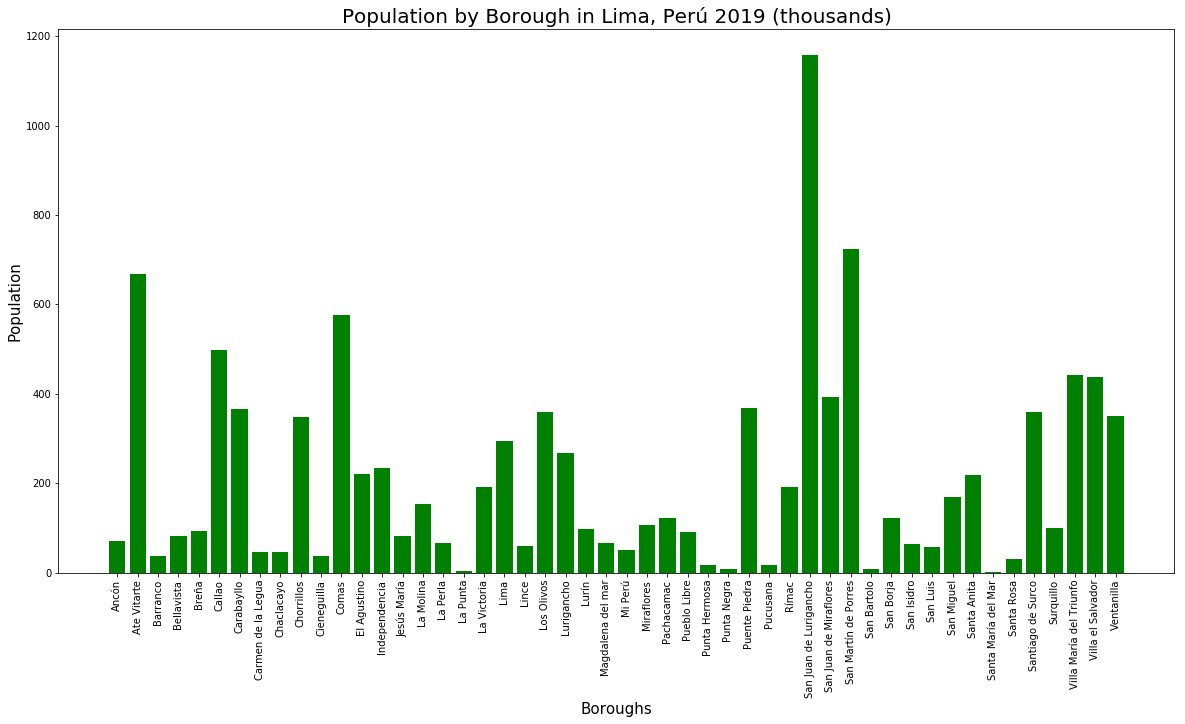

In [10]:
#Prepare the graph
names = df_graph['Borough']
values = df_graph['Population']
plt.figure(figsize=(20, 10))
plt.bar(names, values,color='green')
plt.title('Population by Borough in Lima, Perú 2019 (thousands)',size=20) # add title to the plot
plt.xlabel('Boroughs',size=15) # add to x-label to the plot
plt.ylabel('Population',size=15) # add y-label to the plot
plt.xticks(rotation=90)
plt.show()

### 3.3. Borughs grouped by Socioeconomic level

#### In this case the next master data show the Socioeconomic level of the population by geographic axes, the most high level is AB, C, D, E respectively:

In [12]:
#Read file with districts (Boroughs) levels
#df_economic_st = pd.read_excel('Economic_Structure.xlsx')
#df_economic_st.head(8)
body = client_0fc2bc806def43ae8a798aa0556ecb5e.get_object(Bucket='courseracapstoneweek2-donotdelete-pr-1ji3u52ip51al7',Key='Economic_Structure.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_economic_st = pd.read_excel(body)
df_economic_st.head()


,Axes,Population,Level AB,Level C,Level D,Level E
0,Lima Norte,2627.6,22.9,44.1,27.6,5.4
1,Lima Centro,828.4,33.1,43.3,20.2,3.5
2,Lima Moderna,1416.0,76.8,17.4,4.5,1.3
3,Lima Este,2616.4,17.7,45.7,29.6,7.0
4,Lima Sur,1839.8,13.3,53.4,27.4,5.9


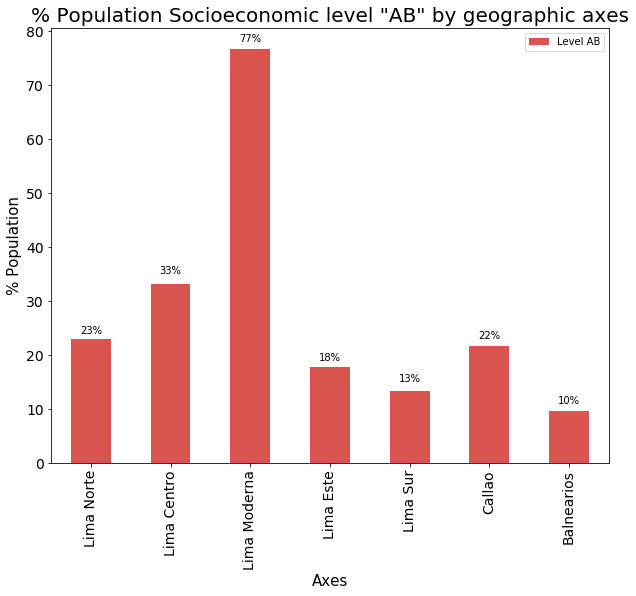

In [13]:
#Prepare the graph
df_graphics = df_economic_st.iloc[:,[0,2]]
df_graphics.set_index('Axes', inplace=True)

df_graphics.plot(kind='bar', figsize=(10, 8),color=['#d9534f'],fontsize=14)
plt.title('% Population Socioeconomic level "AB" by geographic axes',size=20) # add title to the plot
plt.xlabel('Axes',size=15) # add to x-label to the plot
plt.ylabel('% Population',size=15) # add y-label to the plot
plt.xticks(rotation=90)

value1=0
index1=0
for index, value in df_graphics.iterrows():
    label = value['Level AB']
    label = format(label/100, '0.00%') # format int with commas
    index1= int(value['Level AB']) + 2
    plt.annotate(label, xy=(value1, index1 ),ha='center',fontsize=10)
    value1=value1 + 1
plt.show()


#### For our analysis we will focus on the highest socio-economic level "AB", its "Lima Moderna" axe:

In [14]:
#Order by the levels for 
Orderby_level = df_economic_st.sort_values('Level AB',ascending=False)
Orderby_level.head(1)

,Axes,Population,Level AB,Level C,Level D,Level E
2,Lima Moderna,1416.0,76.8,17.4,4.5,1.3


#### This axe involved to next Boroughs:

In [15]:
#Merge two last dataframes by common ID (Axes)
df_merge_col = pd.merge(df_districts, df_economic_st, on='Axes')
#Filter rows en new dataframe, only  Boroughs of 'Lima Moderna'
df_Level_Borough = df_merge_col[df_merge_col.Axes.isin(['Lima Moderna'])]
df_Level_Borough.head(20)

,Borough,Axes,Latitude,Longitude,Population_x,Population_y,Level AB,Level C,Level D,Level E
14,Barranco,Lima Moderna,-12.1492,-77.0217,37.5,1416.0,76.8,17.4,4.5,1.3
15,Jesús María,Lima Moderna,-12.0700,-77.0453,82.0,1416.0,76.8,17.4,4.5,1.3
16,La Molina,Lima Moderna,-12.0789,-76.9169,154.0,1416.0,76.8,17.4,4.5,1.3
17,Lince,Lima Moderna,-12.0833,-77.0317,59.6,1416.0,76.8,17.4,4.5,1.3
18,Magdalena del mar,Lima Moderna,-12.1002,-77.0647,65.8,1416.0,76.8,17.4,4.5,1.3
19,Miraflores,Lima Moderna,-12.1207,-77.0299,107.8,1416.0,76.8,17.4,4.5,1.3
20,Pueblo Libre,Lima Moderna,-12.0753,-77.0659,90.7,1416.0,76.8,17.4,4.5,1.3
21,San Borja,Lima Moderna,-12.1072,-76.9992,122.9,1416.0,76.8,17.4,4.5,1.3
22,San Isidro,Lima Moderna,-12.0991,-77.0375,65.5,1416.0,76.8,17.4,4.5,1.3
23,San Miguel,Lima Moderna,-12.0763,-77.0909,170.3,1416.0,76.8,17.4,4.5,1.3


In [16]:
#Select work data final
df_Final_Borough = df_Level_Borough.loc[:, ['Borough','Axes','Latitude','Longitude']]
df_Final_Borough

,Borough,Axes,Latitude,Longitude
14,Barranco,Lima Moderna,-12.1492,-77.0217
15,Jesús María,Lima Moderna,-12.0700,-77.0453
16,La Molina,Lima Moderna,-12.0789,-76.9169
17,Lince,Lima Moderna,-12.0833,-77.0317
18,Magdalena del mar,Lima Moderna,-12.1002,-77.0647
19,Miraflores,Lima Moderna,-12.1207,-77.0299
20,Pueblo Libre,Lima Moderna,-12.0753,-77.0659
21,San Borja,Lima Moderna,-12.1072,-76.9992
22,San Isidro,Lima Moderna,-12.0991,-77.0375
23,San Miguel,Lima Moderna,-12.0763,-77.0909


### 4. Results

#### I utilized the “Foursquare API” to explore the boroughs and “Technical Services” (reparation and sale computers, laptops and accessories) venues. I aplied, as limit, 100 venues and the radius 1500 meter for each borough from their given latitude and longitude informations, indicated in the last table. 

In [17]:
#Define credentials
CLIENT_ID = 'NRLNZ2NEDSFSGJROUFPMOOPGU4DGX23AZOWRVZVMC5JABQS2' # your Foursquare ID
CLIENT_SECRET = 'NR5INTLA5BFO0P33TT520C1DUSI2J43IWSZISDNHYCUGI2BE' # your Foursquare Secret
VERSION = '20180605'
RADIUS = 1500
LIMIT = 100
search_query = 'Tecnico'
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [18]:
#Search for each Borough calling to Foursquare API, to find Technical Service venues for computers ann laptos:
Flag = 0
for index, row in df_Final_Borough.iterrows():
    Bor = row['Borough']
    Axe = row['Axes']
    Lat = row['Latitude']
    Lng = row['Longitude']
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Lat, Lng, VERSION, search_query, RADIUS, LIMIT)
    # assign relevant part of JSON to venues
    results = requests.get(url).json()
    venues = results['response']['venues']

    # tranform venues into a dataframe
    venues_list_1 = json_normalize(venues)
    venues_list_1['location.Borough'] = Bor #Add new column
    if Flag == 0:
        venues_list_2 = venues_list_1
        Flag = 1
    else:
        # Restablecer los valores de índice a la segunda __DataFrame__ adjunta correctamente
        venues_list_1 = venues_list_1.reset_index(drop=True)
        # Apilar los __DataFrames__ uno encima del otro
        venues_list_2 = pd.concat([venues_list_2, venues_list_1], axis=0)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [19]:
#Verify dataframe with API results:
venues_list_2

,categories,hasPerk,id,location.Borough,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,507979f6e4b07018b64fda6c,Barranco,Av. Venegas 898 B Santiago de Surco,PE,Lima,Perú,NaN,1378.0,"[Av. Venegas 898 B Santiago de Surco, Lima, LI...","[{'label': 'display', 'lat': -12.1406309181500...",-12.140631,-77.012553,LIMA 33,Lima,BYD Servicio Técnico,v-1593451200
0,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",False,50cce8bbe4b0f94b338da9a2,Jesús María,Grl Santa Cruz 777,PE,NaN,Perú,NaN,614.0,"[Grl Santa Cruz 777, Perú]","[{'label': 'display', 'lat': -12.073605, 'lng'...",-12.073605,-77.041020,NaN,NaN,Servicio tecnico consolas,v-1593451200
1,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",False,4fbaa20fe4b0a2484fbefd91,Jesús María,Pasaje Velarde 165,PE,Cercado Lima,Perú,Tienda 108,1758.0,"[Pasaje Velarde 165 (Tienda 108), Cercado Lima...","[{'label': 'display', 'lat': -12.055529, 'lng'...",-12.055529,-77.038811,NaN,Perú,"Soporte técnico PC, Lap tops",v-1593451200
2,"[{'id': '4bf58dd8d48988d174941735', 'name': 'C...",False,4eaec070cc21b06a58251592,Jesús María,NaN,PE,NaN,Perú,NaN,1870.0,[Perú],"[{'label': 'display', 'lat': -12.05502472, 'ln...",-12.055025,-77.037513,NaN,NaN,Servicio Tecnico B&C,v-1593451200
3,"[{'id': '4eb1bea83b7b6f98df247e06', 'name': 'F...",False,4f14d52ce4b03f4c03162058,Jesús María,NaN,PE,NaN,Perú,NaN,515.0,[Perú],"[{'label': 'display', 'lat': -12.0721200919896...",-12.072120,-77.041090,NaN,NaN,Sociedad Nacional de Técnicos,v-1593451200
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,5102ef97e4b0b83db8ea88df,Lince,NaN,PE,NaN,Perú,NaN,1061.0,[Perú],"[{'label': 'display', 'lat': -12.09042, 'lng':...",-12.090420,-77.038187,NaN,NaN,Sociedad De Asesoramiento Tecnico,v-1593451200
1,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",False,4ebea9aea17c8cdeb8fb3113,Lince,Calle Manuel Arrisueño 632,PE,Lima,Perú,Av.Carlos Villarán,1397.0,[Calle Manuel Arrisueño 632 (Av.Carlos Villará...,"[{'label': 'display', 'lat': -12.0875351939467...",-12.087535,-77.019610,LIMA 13,Lima,MN Electronics - Servicio Técnico,v-1593451200
2,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",False,50cce8bbe4b0f94b338da9a2,Lince,Grl Santa Cruz 777,PE,NaN,Perú,NaN,1481.0,"[Grl Santa Cruz 777, Perú]","[{'label': 'display', 'lat': -12.073605, 'lng'...",-12.073605,-77.041020,NaN,NaN,Servicio tecnico consolas,v-1593451200
3,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",False,51408f18e4b0b797e4463b99,Lince,NaN,PE,NaN,Perú,NaN,1747.0,[Perú],"[{'label': 'display', 'lat': -12.0989826730155...",-12.098983,-77.030964,NaN,NaN,Electronica San Isidro - Serv. Técnico Sony,v-1593451200
4,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,553fe701498e6d51a260bfa0,Lince,Los Geranios 446,PE,Lince,Perú,NaN,1037.0,"[Los Geranios 446, Lince, Perú]","[{'label': 'display', 'lat': -12.0903352134382...",-12.090335,-77.025447,NaN,Lima,Asesores Técnicos Asociados,v-1593451200


#### 4.1 Explore Technical Services and define information of interest and filter dataframe

In [20]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in venues_list_2.columns if col.startswith('location.')] + ['id']
dataframe_filtered = venues_list_2.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,Borough,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,BYD Servicio Técnico,Automotive Shop,Barranco,Av. Venegas 898 B Santiago de Surco,PE,Lima,Perú,NaN,1378.0,"[Av. Venegas 898 B Santiago de Surco, Lima, LI...","[{'label': 'display', 'lat': -12.1406309181500...",-12.140631,-77.012553,LIMA 33,Lima,507979f6e4b07018b64fda6c
0,Servicio tecnico consolas,Electronics Store,Jesús María,Grl Santa Cruz 777,PE,NaN,Perú,NaN,614.0,"[Grl Santa Cruz 777, Perú]","[{'label': 'display', 'lat': -12.073605, 'lng'...",-12.073605,-77.041020,NaN,NaN,50cce8bbe4b0f94b338da9a2
1,"Soporte técnico PC, Lap tops",Electronics Store,Jesús María,Pasaje Velarde 165,PE,Cercado Lima,Perú,Tienda 108,1758.0,"[Pasaje Velarde 165 (Tienda 108), Cercado Lima...","[{'label': 'display', 'lat': -12.055529, 'lng'...",-12.055529,-77.038811,NaN,Perú,4fbaa20fe4b0a2484fbefd91
2,Servicio Tecnico B&C,Coworking Space,Jesús María,NaN,PE,NaN,Perú,NaN,1870.0,[Perú],"[{'label': 'display', 'lat': -12.05502472, 'ln...",-12.055025,-77.037513,NaN,NaN,4eaec070cc21b06a58251592
3,Sociedad Nacional de Técnicos,Factory,Jesús María,NaN,PE,NaN,Perú,NaN,515.0,[Perú],"[{'label': 'display', 'lat': -12.0721200919896...",-12.072120,-77.041090,NaN,NaN,4f14d52ce4b03f4c03162058
0,Sociedad De Asesoramiento Tecnico,Office,Lince,NaN,PE,NaN,Perú,NaN,1061.0,[Perú],"[{'label': 'display', 'lat': -12.09042, 'lng':...",-12.090420,-77.038187,NaN,NaN,5102ef97e4b0b83db8ea88df
1,MN Electronics - Servicio Técnico,Electronics Store,Lince,Calle Manuel Arrisueño 632,PE,Lima,Perú,Av.Carlos Villarán,1397.0,[Calle Manuel Arrisueño 632 (Av.Carlos Villará...,"[{'label': 'display', 'lat': -12.0875351939467...",-12.087535,-77.019610,LIMA 13,Lima,4ebea9aea17c8cdeb8fb3113
2,Servicio tecnico consolas,Electronics Store,Lince,Grl Santa Cruz 777,PE,NaN,Perú,NaN,1481.0,"[Grl Santa Cruz 777, Perú]","[{'label': 'display', 'lat': -12.073605, 'lng'...",-12.073605,-77.041020,NaN,NaN,50cce8bbe4b0f94b338da9a2
3,Electronica San Isidro - Serv. Técnico Sony,Electronics Store,Lince,NaN,PE,NaN,Perú,NaN,1747.0,[Perú],"[{'label': 'display', 'lat': -12.0989826730155...",-12.098983,-77.030964,NaN,NaN,51408f18e4b0b797e4463b99
4,Asesores Técnicos Asociados,Office,Lince,Los Geranios 446,PE,Lince,Perú,NaN,1037.0,"[Los Geranios 446, Lince, Perú]","[{'label': 'display', 'lat': -12.0903352134382...",-12.090335,-77.025447,NaN,Lima,553fe701498e6d51a260bfa0


#### 4.2 Show graph for Technical Services by Borough

In [21]:
venues_map = folium.Map(location=[-12.04318, -77.02824], zoom_start=10) 

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map


#### 4.3 Let's check how many venues (Technical Service) were returned for each Borough

In [22]:
df_CantVenues = dataframe_filtered.groupby('Borough').count().reset_index()
df_CantVenues

,Borough,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Barranco,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
1,Jesús María,4,4,2,4,1,4,1,4,4,4,4,4,0,1,4
2,Lince,6,6,3,6,2,6,1,6,6,6,6,6,1,2,6
3,Magdalena del mar,3,3,2,3,3,3,0,3,3,3,3,3,0,3,3
4,Miraflores,10,10,5,10,6,10,2,10,10,10,10,10,5,6,10
5,Pueblo Libre,2,2,1,2,1,2,0,2,2,2,2,2,1,1,2
6,San Borja,4,4,4,4,4,4,3,4,4,4,4,4,0,4,4
7,San Isidro,9,9,5,9,4,9,2,9,9,9,9,9,1,4,9
8,San Miguel,8,7,7,8,4,8,0,8,8,8,8,8,2,4,8
9,Santiago de Surco,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3


#### 4.4 Show the graph

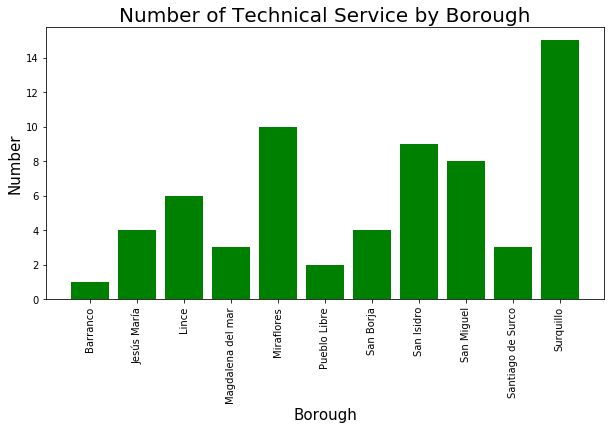

In [23]:
names = df_CantVenues['Borough']
values = df_CantVenues['name']
plt.figure(figsize=(10, 5))
plt.bar(names, values, color='green')
plt.title('Number of Technical Service by Borough',size=20) # add title to the plot
plt.xlabel('Borough',size=15) # add to x-label to the plot
plt.ylabel('Number',size=15) # add y-label to the plot
plt.xticks(rotation=90)
plt.show()

#### 4.5 Analyze Each Borough

In [24]:
# one hot encoding
Borough_onehot = pd.get_dummies(dataframe_filtered[['categories']], prefix="", prefix_sep="")

# add Borough column back to dataframe
Borough_onehot['Borough'] = dataframe_filtered['Borough'] 

# move Borough column to the first column
fixed_columns = [Borough_onehot.columns[-1]] + list(Borough_onehot.columns[:-1])
Borough_onehot = Borough_onehot[fixed_columns]

Borough_onehot.head()

,Borough,Assisted Living,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store,College Lab,Convenience Store,...,General Entertainment,Gym,Home Service,IT Services,Medical Lab,Meeting Room,Office,Other Repair Shop,Professional & Other Places,Shop & Service
0,Barranco,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Jesús María,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jesús María,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jesús María,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jesús María,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.6 Next, let's group rows by Borough and by taking the mean of the frequency of occurrence of each category

In [25]:
Borough_grouped = Borough_onehot.groupby('Borough').mean().reset_index()
Borough_grouped

,Borough,Assisted Living,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store,College Lab,Convenience Store,...,General Entertainment,Gym,Home Service,IT Services,Medical Lab,Meeting Room,Office,Other Repair Shop,Professional & Other Places,Shop & Service
0,Barranco,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Jesús María,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Lince,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
3,Magdalena del mar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Miraflores,0.000000,0.100000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.00,...,0.000,0.000,0.000000,0.100000,0.100000,0.000000,0.000000,0.100000,0.000000,0.100000
5,Pueblo Libre,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
6,San Borja,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,San Isidro,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.00,...,0.000,0.000,0.000000,0.000000,0.000000,0.111111,0.222222,0.000000,0.111111,0.111111
8,San Miguel,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.00,...,0.125,0.125,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000
9,Santiago de Surco,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 4.7. Print each Borough along with the top 5 most common venues

In [26]:
num_top_venues = 5

for hood in Borough_grouped['Borough']:
    print("----"+hood+"----")
    temp = Borough_grouped[Borough_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barranco----
                         venue  freq
0              Automotive Shop   1.0
1              Assisted Living   0.0
2       Furniture / Home Store   0.0
3  Professional & Other Places   0.0
4            Other Repair Shop   0.0


----Jesús María----
                         venue  freq
0            Electronics Store  0.50
1                      Factory  0.25
2              Coworking Space  0.25
3       Furniture / Home Store  0.00
4  Professional & Other Places  0.00


----Lince----
                         venue  freq
0            Electronics Store  0.50
1                       Office  0.33
2                      Factory  0.17
3       Furniture / Home Store  0.00
4  Professional & Other Places  0.00


----Magdalena del mar----
                         venue  freq
0            Electronics Store   1.0
1              Assisted Living   0.0
2       Furniture / Home Store   0.0
3  Professional & Other Places   0.0
4            Other Repair Shop   0.0


----Miraflores----
        

#### 4.8 Now create the new dataframe and display the top 10 venues for each Borough.

In [27]:
#Define the function
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = Borough_grouped['Borough']

for ind in np.arange(Borough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Borough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barranco,Automotive Shop,Shop & Service,Professional & Other Places,Auditorium,Auto Garage,Building,Business Service,Camera Store,College Lab,Convenience Store
1,Jesús María,Electronics Store,Coworking Space,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
2,Lince,Electronics Store,Office,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
3,Magdalena del mar,Electronics Store,Professional & Other Places,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store,College Lab,Convenience Store
4,Miraflores,Electronics Store,IT Services,Auditorium,Auto Garage,Business Service,Department Store,Shop & Service,Other Repair Shop,Medical Lab,Home Service


#### 4.9 Cluster Neighborhoods
##### I used Kmeans to cluster the Boroughs with k=4, because the venues are the most important in the "Lima Moderna" axe:

In [29]:
#Run k-means into 4 clusters
#---------------------------
# set number of clusters
kclusters = 4
Borough_grouped_clustering = Borough_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=12).fit(Borough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 2, 0, 3, 2, 0, 0, 0], dtype=int32)

In [30]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each Borough.
#----------------------------------------------------------------------------------------------
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Borough_merged = df_Final_Borough

# merge dataframes to add latitude/longitude for each Borough
Borough_merged = Borough_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')
Borough_merged

,Borough,Axes,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Barranco,Lima Moderna,-12.1492,-77.0217,1.0,Automotive Shop,Shop & Service,Professional & Other Places,Auditorium,Auto Garage,Building,Business Service,Camera Store,College Lab,Convenience Store
15,Jesús María,Lima Moderna,-12.0700,-77.0453,2.0,Electronics Store,Coworking Space,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
16,La Molina,Lima Moderna,-12.0789,-76.9169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Lince,Lima Moderna,-12.0833,-77.0317,2.0,Electronics Store,Office,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
18,Magdalena del mar,Lima Moderna,-12.1002,-77.0647,2.0,Electronics Store,Professional & Other Places,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store,College Lab,Convenience Store
19,Miraflores,Lima Moderna,-12.1207,-77.0299,0.0,Electronics Store,IT Services,Auditorium,Auto Garage,Business Service,Department Store,Shop & Service,Other Repair Shop,Medical Lab,Home Service
20,Pueblo Libre,Lima Moderna,-12.0753,-77.0659,3.0,Other Repair Shop,Auto Garage,Shop & Service,Department Store,Auditorium,Automotive Shop,Building,Business Service,Camera Store,College Lab
21,San Borja,Lima Moderna,-12.1072,-76.9992,2.0,Electronics Store,Convenience Store,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
22,San Isidro,Lima Moderna,-12.0991,-77.0375,0.0,Office,Shop & Service,Professional & Other Places,Automotive Shop,Camera Store,Coworking Space,Electronics Store,Meeting Room,Home Service,College Lab
23,San Miguel,Lima Moderna,-12.0763,-77.0909,0.0,Building,Meeting Room,IT Services,Gym,General Entertainment,Furniture / Home Store,Shop & Service,Convenience Store,Auditorium,Auto Garage


In [31]:
#Filter rows en new dataframe, excluying 'NaN' values rows in Cluster label column
Borough_filter = Borough_merged[Borough_merged['Borough'] != 'La Molina']
Borough_filter['Cluster Labels']=Borough_filter['Cluster Labels'].astype('int64')
Borough_filter

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Borough,Axes,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Barranco,Lima Moderna,-12.1492,-77.0217,1,Automotive Shop,Shop & Service,Professional & Other Places,Auditorium,Auto Garage,Building,Business Service,Camera Store,College Lab,Convenience Store
15,Jesús María,Lima Moderna,-12.0700,-77.0453,2,Electronics Store,Coworking Space,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
17,Lince,Lima Moderna,-12.0833,-77.0317,2,Electronics Store,Office,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
18,Magdalena del mar,Lima Moderna,-12.1002,-77.0647,2,Electronics Store,Professional & Other Places,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store,College Lab,Convenience Store
19,Miraflores,Lima Moderna,-12.1207,-77.0299,0,Electronics Store,IT Services,Auditorium,Auto Garage,Business Service,Department Store,Shop & Service,Other Repair Shop,Medical Lab,Home Service
20,Pueblo Libre,Lima Moderna,-12.0753,-77.0659,3,Other Repair Shop,Auto Garage,Shop & Service,Department Store,Auditorium,Automotive Shop,Building,Business Service,Camera Store,College Lab
21,San Borja,Lima Moderna,-12.1072,-76.9992,2,Electronics Store,Convenience Store,Factory,Department Store,Auditorium,Auto Garage,Automotive Shop,Building,Business Service,Camera Store
22,San Isidro,Lima Moderna,-12.0991,-77.0375,0,Office,Shop & Service,Professional & Other Places,Automotive Shop,Camera Store,Coworking Space,Electronics Store,Meeting Room,Home Service,College Lab
23,San Miguel,Lima Moderna,-12.0763,-77.0909,0,Building,Meeting Room,IT Services,Gym,General Entertainment,Furniture / Home Store,Shop & Service,Convenience Store,Auditorium,Auto Garage
24,Santiago de Surco,Lima Moderna,-12.1464,-77.0067,0,Electronics Store,Automotive Shop,Home Service,Department Store,Auditorium,Auto Garage,Building,Business Service,Camera Store,College Lab


#### 4.10 Visualize the resulting clusters

In [32]:
# create map
map_clusters = folium.Map(location=[-12.04318, -77.02824], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Borough_filter['Latitude'], Borough_filter['Longitude'], Borough_filter['Borough'], Borough_filter['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5. Discussion
#### I can estimate the number of 1st Most Common Venue in each cluster. Thus, I created a bar chart which may help us to find proper labels for each cluster.

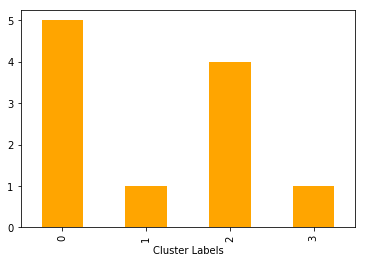

In [33]:
Borough_filter.groupby('Cluster Labels').count()["1st Most Common Venue"].plot(kind='bar',color='orange')

When we examine above graph we can label each cluster as follows:

#### Cluster 0 : Diferent services (repair of computer, laptops and accesories)
#### Cluster 1 : Electronics Store (sale and repair of computer, laptops and accesories)
#### Cluster 2 : Other reparacion services
#### Cluster 3 : Other services

#### The 4 identified clusters help us to view the types of business of technical service, sale and repair of computers currently offered in these districts of "Modern Lima" with high economic income per family.

#### I set the optimum k value to 4. However, only 13 district coordinates were used. For future studies, these data can also be accessed dynamically from specific platforms or packages, using coordinates in real time.

### 6. Conclusion

#### The city of Lima, Peru, is divided into 50 districts (Boroughs), and organized into 7 axes or zones, and 5 socioeconomic segments (A, B, C, D, E). In the present study, I focused only on segment AB, which is the one with the highest economic income and belongs to the axe of "Modern Lima" with 13 districts.

#### The objective of this study is to inform citizens that, due to the Pandemic and the fact that they are confined to their homes, the option of locating the closest place to their homes to find technical repair service and sale of computers, laptops and accessories, is necessary for working, studying and entertaining at home.

#### At the same time, it helps to identify potential investors of the places where you can invest in a business of these types, since the number of devices in families is increasing over and over again, therefore it is a great opportunity.